# **Airlines Customer Satisfaction and Business Planning**

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Read/Import Database

In [2]:
#https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction
df = pd.read_csv('Invistico_Airline.csv')

# Data Analysis

In [3]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
#mengetahui jumlah baris dan kolom
df.shape

(129880, 23)

In [6]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

## Change Satisfaction Column to Boolean Satisfaction Coloumn

Encoding kolom **satisfaction** dari kategorikal menjadi numerik

In [7]:
#melihat isi kolom
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [8]:
# membuat label Encoder
le = LabelEncoder()

In [9]:
# menggunakan function .fit_transform untuk mencocokan label
label = le.fit_transform(df['satisfaction'])
label

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
# menghapus kolom clarity dari
df.drop("satisfaction", axis=1, inplace=True)

In [11]:
# menambahkan array ke dataframe
df["satisfaction"] = label

In [12]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,3,3,4,4,4,2,0,0.0,1
129876,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,3,2,3,3,1,2,1,174,172.0,0
129877,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,4,4,3,4,2,3,2,155,163.0,0
129878,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,3,3,2,3,2,1,2,193,205.0,0


In [13]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

sudah selesai di encoding dan type data satisfaction sudah berubah menjadi numerik

## Describe aritmatic

In [14]:
#melihat nilai aritmatik dari mean, standar deviasi dll
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129,0.547328
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650,0.497757
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


## Missing Value

In [15]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [16]:
df = df.dropna()
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Duplicated Data

In [17]:
# jumlah data duplicated
df.duplicated().sum()

0

## Outlier

In [18]:
#mencari outliers menggunakan hitungan matematika
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [19]:
outliers = find_outliers_IQR(df["Age"])

print("jumlah outliers: "+ str(len(outliers)))

print("nilai outlier maksimum : "+ str(outliers.max()))

print("nilai outlier minimum : "+ str(outliers.min()))

jumlah outliers: 0
nilai outlier maksimum : nan
nilai outlier minimum : nan


In [20]:
fig = px.box(df, y = "Age")
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



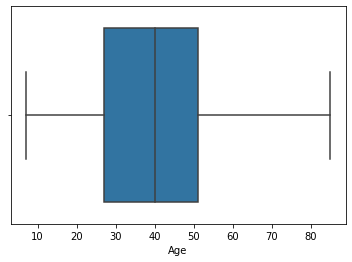

In [21]:
sns.boxplot(df['Age'])

dari hasil diatas tidak ditemukan outlier pada kolom Age, dengan range Age 7-85 tahun. Dengan usia rata-rata 40 tahun

## Visualisasi Data

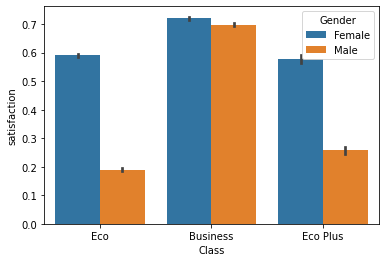

In [25]:
#Barlot untuk membandingkan variabel satisfication, class dan gender
sns.barplot(data=df, x="Class", y="satisfaction", hue="Gender")

dari perbandingan variabel diatas dapat dilihat bahwa Female memiliki tingkat satisfaction lebih tinggi dari Male pada semua Class

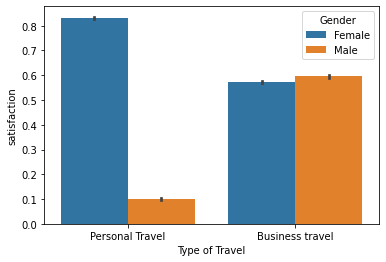

In [26]:
#Barlot untuk membandingkan variabel satisfaction, Type of Travel dan Gender
sns.barplot(data=df, x="Type of Travel", y="satisfaction", hue="Gender")

dari perbandingan variabel Type of Travel untuk Personal Travel Female memiliki tingkat satisfaction jauh lebih tinggi dari pada Male. dan untuk Business Travel Male memiliki tingkat satisfaction sedikit lebih tinggi daripada Female

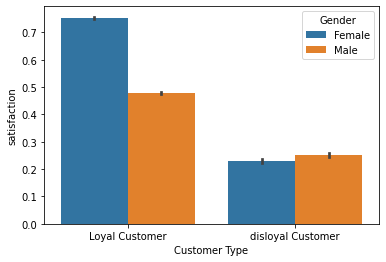

In [54]:
#Barlot untuk membandingkan variabel satisfaction, Customer Type dan Gender
sns.barplot(data=df, x="Customer Type", y="satisfaction", hue="Gender")

dari perbandingan Customer Type untuk Loyal Customer Female memiliki tingkat satisfaction lebih tinggi daripada Male. dan untuk Disloyal Customer Male memiliki tingkat satisfaction lebih tinggi daripada Female

Membandingkan variabel Delay Lengths (Arrival dan Departure Delay in Minutes), Flight Distance

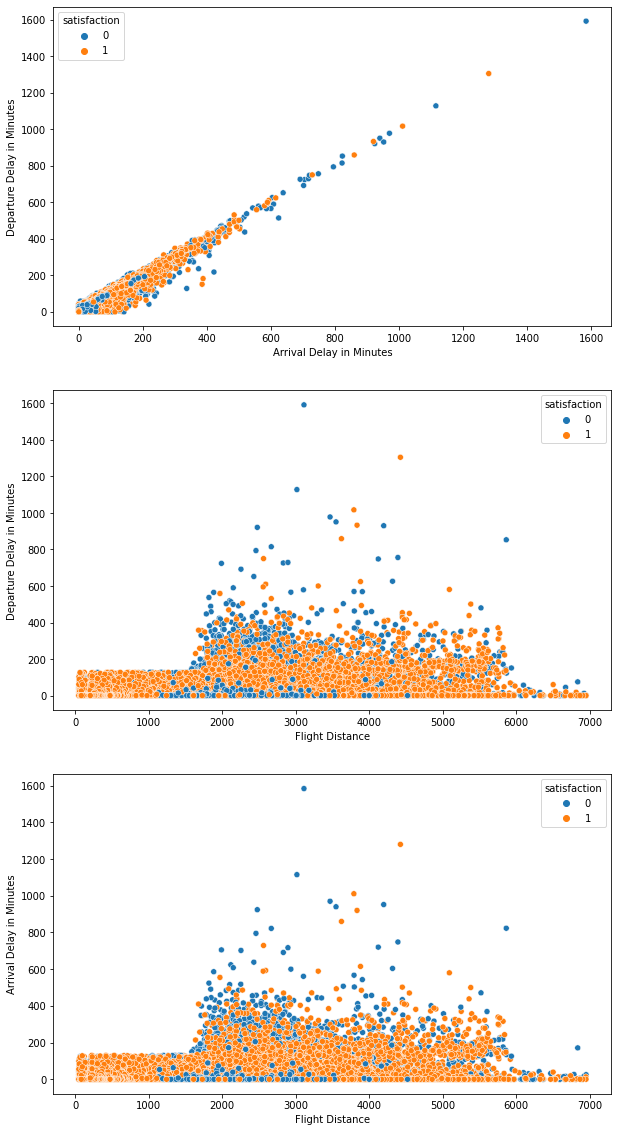

In [56]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(10,20)
sns.scatterplot(ax = axes[0], data = df, x = 'Arrival Delay in Minutes', y =  'Departure Delay in Minutes', hue = 'satisfaction')
sns.scatterplot(ax = axes[1], data = df, x = 'Flight Distance', y =  'Departure Delay in Minutes', hue = 'satisfaction')
sns.scatterplot(ax = axes[2], data = df, x = 'Flight Distance', y =  'Arrival Delay in Minutes', hue = 'satisfaction')

plt.show()

tingkat satisfaction sepertinya semakin menurun sebanding dengan lama Delay

Ada berapa orang yg satisfied dan dissatisfied

In [47]:
fig=px.pie(df,values=df["satisfaction"].value_counts(),
           names=["Satisfied","Dissatisfied"],title="Rasio Satisfied dan Dissatisfied",
           hole=.4,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=25)
fig.show()

satisfied 54.7% dan dissatisfied 45.3%

Berapa banyak Female dan Male yg satisfied dan dissatisfied

In [50]:
fig=px.histogram(df,x="Gender",facet_col="satisfaction",color="satisfaction",color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="<b>"+"Gender"+" vs satisfaction", title_font_size=30,
                     font_size=20,
                     title_x=0.5,
                     hoverlabel_font_size=15,template="plotly")

fig.show()

pada Satisfaction = 1(satisfied) Female lebih banyak daripada Male. dan pada Satisfaction = 0(dissatisfied) Male lebih banyak daripada Female

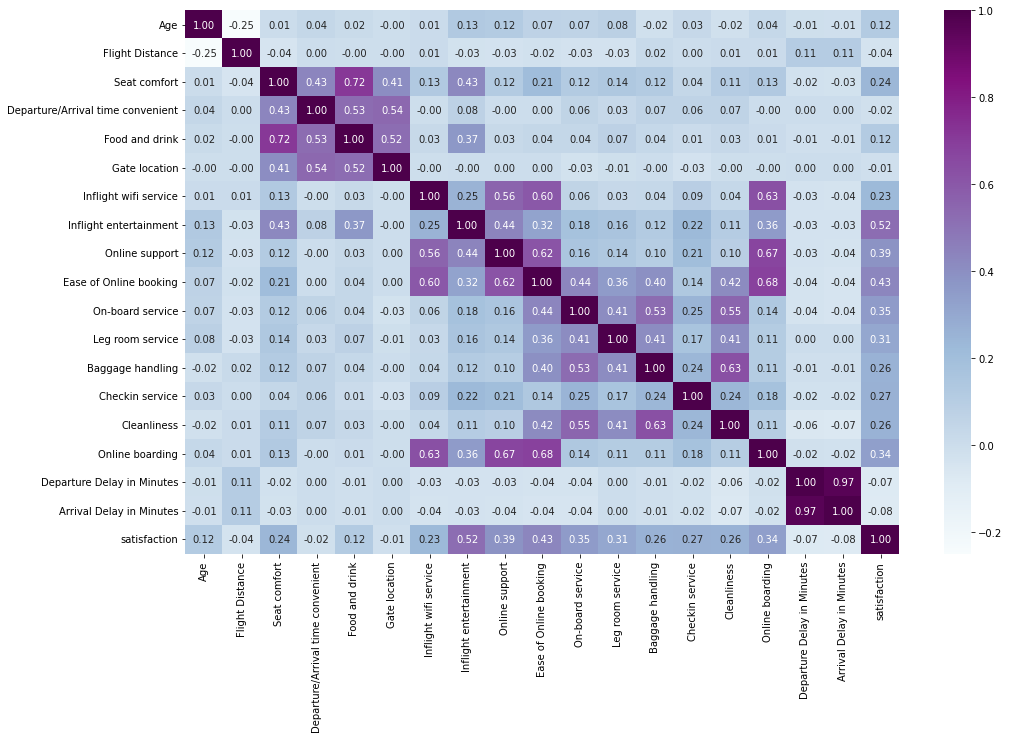

In [34]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

dari correlation heatmap diatas dapat dilihat Arrival Delay in Minutes dan Departure Delay in Minure memiliki korelasi yg kuat untuk menentukan Satisfaction

#Modelling

## Categorical Column Transformation

In [57]:
# Onehot Encoding
onehot_columns = ['Gender', 'Customer Type','Type of Travel','Class']
df = pd.get_dummies(df, columns = onehot_columns)

In [58]:
#convert type data float ke int
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
print(df.dtypes)

Age                                  int64
Flight Distance                      int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction                         int64
Gender_Female                        uint8
Gender_Male                          uint8
Customer Type_Loyal Customer         uint8
Customer Type_disloyal Customer      uint8
Type of Tra

In [59]:
df

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,1,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,1,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,1,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,1,1,0,0,1,0,1,0,1,0
129876,63,2087,2,3,2,4,2,1,1,3,...,0,0,1,0,1,0,1,1,0,0
129877,69,2320,3,0,3,3,3,2,2,4,...,0,0,1,0,1,0,1,0,1,0
129878,66,2450,3,2,3,2,3,2,2,3,...,0,0,1,0,1,0,1,0,1,0


Sudah terlihat bahwa semua type data sudah menjadi numeric semua

## Training and Tes Data

### Dataset Splitting

In [60]:
df['satisfaction'].value_counts()

1    70882
0    58605
Name: satisfaction, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df_train, df_test = train_test_split(df,
                                     test_size = 0.25, random_state = 1)

In [63]:
x_train_data = df_train.loc[:, df_train.columns!='satisfaction']
y_train_data = df_train.loc[:, df_train.columns=='satisfaction']

x_test_data = df_test.loc[:, df_test.columns!='satisfaction']
y_test_data = df_test.loc[:, df_test.columns=='satisfaction']

### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)

    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))


In [66]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

<ipython-input-66-675ee08c1d84>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.9601198566662548
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14732
           1       0.97      0.95      0.96     17640

    accuracy                           0.96     32372
   macro avg       0.96      0.96      0.96     32372
weighted avg       0.96      0.96      0.96     32372

------
Assuming 1 as positive, we get:

True Positive: 16813
True Negative: 14268
False Positive: 464
False Negative: 827

Precision: 0.9731434855588355
Recall: 0.9531179138321996
F1-Score: 0.9630266059512559


hasil analisis:
1. True Positif = 16813 yg berarti diprediksi puas/satisfied dan benar satisfied sebanyak 16813.
2. True Negative = 14268 yg berarti diprediksi tidak puas ternyata tidak puas sebanyak 14268.
3. False Positive = 464 yg berarti diprediksi puas ternyata tidak puas sebanyak 464.
4. False Negative = 827 yg berarti diprediksi tidak puas dan ternyata tidak puas sebanyak 827.

kita juga temukan:
1. Accuracy = 96%. yg berarti perbandingan TP dan TN terhadap semua data tingkat akurasinya sebanyak 96%.
2. Precision = 97% yg berarti diantara semua customer yg diprediksi puas ternyata yg sesungguhnya puas sebanyak 97%.
3. Recall = 95% yg berarti diantara semua customer yg diprediksi puas yg berhasil diprediksi puas sebanyak 95%.

Kita ingin memprediksi kepuasan/satisfied customer untuk rencana bisnis kedepannya. Dari hasil diatas ingin menghilangkan False Positive, yaitu kita prediksi satisfied ternyata dissatisfied.

#Insight dan Recommendation

## Insight
- untuk semua jenis class (Eco, Business, Eco Pluss) Female memiliki tingkat satisfaction lebih tinggi dari Male. tapi pada class business perbedaan Satisfaction female dan Male hanya selisih sedikit saja.
- untuk Type of Travel (Personal Travel dan Business Travel), pada Personal Travel Female memiliki tingkat satisfaction jauh lebih tinggi dari pada Male. dan untuk Business Travel Male memiliki tingkat satisfaction sedikit lebih tinggi daripada Female.
- untuk Customer Type (Loyal Customer) Female memiliki tingkat satisfaction lebih tinggi daripada Male. dan untuk Disloyal Customer Male memiliki tingkat satisfaction lebih tinggi daripada Female.
- tingkat satisfaction sepertinya semakin menurun sebanding dengan lamanya Delay(Departure maupun Arrival)
- Female memiliki jumlah satisfied lebih banyak dibanding Male, dan sebaliknya Male memiliki jumlah Dissatisfied lebih banyak


## Recommendation
- Tingkatkan service untuk Male pada jenis Class Eco dan Eco Plus. misal promo yg menarik untuk tgl tertentu
- Tingkatkan service untuk Female pada jenis Class Business. misal promo yg menarik
- Tingkatkan service untuk Male pada Personal Travel, dan untuk Female pada Business Travel. misal promo yg menarik
- Tingkatkan pelayanan service secara keseluruhan untuk meminimalisir sekecil mungkin Delay baik departure maupun arrival.
- secara keseluruhan minimal harus mempertahankan satisfied Female dan harus meningkatkan service untuk Male supaya satisfied Male bisa lebih meningkat